
## Template Code

In [1]:
import sys, os
sys.executable

import graphviz 

We are going to use below mentioned libraries for **data import, processing and visulization**. As we progress, we will use other specific libraries for model building and evaluation. 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sn # visualization library based on matplotlib
import matplotlib.pylab as plt
from sklearn.externals import joblib

#the output of plotting commands is displayed inline within Jupyter notebook
%matplotlib inline 
%load_ext rpy2.ipython

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
raw_df = pd.read_excel( "./IMB 485 Deans Dilemma Data.xlsx", sheet_name='Placement')

raw_df.columns = raw_df.columns.str.lower().str.replace(' ', '_')
raw_df.columns = raw_df.columns.str.lower().str.replace('*', '_')
raw_df.columns = raw_df.columns.str.lower().str.replace('-', '_')

raw_df.head()

raw_df.columns


,slno,gender,gender_b,percent_ssc,board_ssc,board_cbse,board_icse,percent_hsc,board_hsc,stream_hsc,...,percentile_et,percent_mba,s_test_score,specialization_mba,marks_communication,marks_projectwork,marks_boca,placement,placement_b,salary
0,1,M,0,62.00,Others,0,0,88.00,Others,Commerce,...,55.0,58.80,55.0,Marketing & HR,50,65,74,Placed,1,270000
1,2,M,0,76.33,ICSE,0,1,75.33,Others,Science,...,86.5,66.28,86.5,Marketing & Finance,69,70,75,Placed,1,200000
2,3,M,0,72.00,Others,0,0,78.00,Others,Commerce,...,0.0,52.91,0.0,Marketing & Finance,50,61,59,Placed,1,240000
3,4,M,0,60.00,CBSE,1,0,63.00,CBSE,Arts,...,75.0,57.80,75.0,Marketing & Finance,54,66,62,Placed,1,250000
4,5,M,0,61.00,CBSE,1,0,55.00,ISC,Science,...,66.0,59.43,66.0,Marketing & HR,52,65,67,Placed,1,180000


Index(['slno', 'gender', 'gender_b', 'percent_ssc', 'board_ssc', 'board_cbse',
       'board_icse', 'percent_hsc', 'board_hsc', 'stream_hsc',
       'percent_degree', 'course_degree', 'degree_engg', 'experience_yrs',
       'entrance_test', 's_test', 'percentile_et', 'percent_mba',
       's_test_score', 'specialization_mba', 'marks_communication',
       'marks_projectwork', 'marks_boca', 'placement', 'placement_b',
       'salary'],
      dtype='object')

In [5]:
# drop th following columns - they r not of use for the task at hand
cols2drop = ['gender', 'board_ssc', 'placement_b', 'percent_mba',
                                   'marks_projectwork', 'percent_mba', 'marks_communication', 'marks_boca']

raw_df.drop(cols2drop, inplace=True, axis = 'columns')

catColumns = [x for x in raw_df.columns if raw_df[x].dtype == 'object']
catColumns
numColumns = set(raw_df.columns) - set(catColumns + ['slno'])
numColumns

['board_hsc',
 'stream_hsc',
 'course_degree',
 'entrance_test',
 'specialization_mba',
 'placement']

{'board_cbse',
 'board_icse',
 'degree_engg',
 'experience_yrs',
 'gender_b',
 'percent_degree',
 'percent_hsc',
 'percent_ssc',
 'percentile_et',
 's_test',
 's_test_score',
 'salary'}

/home/sayantan/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


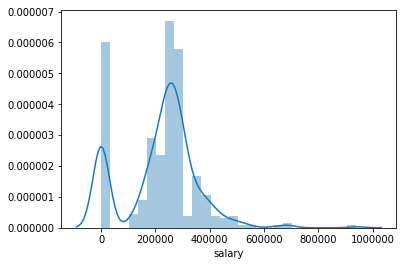

In [6]:
sn.distplot((raw_df['salary']))

Dropping SLNo and Candidate.Ref as these will not be used for any analysis or model building.

In [7]:
#?raw_df.drop()

In [8]:
if set(['slno']).issubset(raw_df.columns):
    raw_df.drop(['slno'],axis=1, inplace=True)
    
raw_df.head()

,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,board_hsc,stream_hsc,percent_degree,course_degree,degree_engg,experience_yrs,entrance_test,s_test,percentile_et,s_test_score,specialization_mba,placement,salary
0,0,62.00,0,0,88.00,Others,Commerce,52.00,Science,0,0,MAT,1,55.0,55.0,Marketing & HR,Placed,270000
1,0,76.33,0,1,75.33,Others,Science,75.48,Computer Applications,0,1,MAT,1,86.5,86.5,Marketing & Finance,Placed,200000
2,0,72.00,0,0,78.00,Others,Commerce,66.63,Engineering,1,0,NaN,0,0.0,0.0,Marketing & Finance,Placed,240000
3,0,60.00,1,0,63.00,CBSE,Arts,58.00,Management,0,0,MAT,1,75.0,75.0,Marketing & Finance,Placed,250000
4,0,61.00,1,0,55.00,ISC,Science,54.00,Engineering,1,1,MAT,1,66.0,66.0,Marketing & HR,Placed,180000



### 2. Structure of the dataset



In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 18 columns):
gender_b              391 non-null int64
percent_ssc           391 non-null float64
board_cbse            391 non-null int64
board_icse            391 non-null int64
percent_hsc           391 non-null float64
board_hsc             391 non-null object
stream_hsc            391 non-null object
percent_degree        391 non-null float64
course_degree         391 non-null object
degree_engg           391 non-null int64
experience_yrs        391 non-null int64
entrance_test         324 non-null object
s_test                391 non-null int64
percentile_et         391 non-null float64
s_test_score          391 non-null float64
specialization_mba    391 non-null object
placement             391 non-null object
salary                391 non-null int64
dtypes: float64(5), int64(7), object(6)
memory usage: 55.1+ KB


In [10]:
raw_df.placement.value_counts()
raw_df.describe(include='all').transpose()
#raw_df.describe().transpose()

Placed        312
Not Placed     79
Name: placement, dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender_b,391,NaN,NaN,NaN,0.324808,0.468903,0,0,0,1,1
percent_ssc,391,NaN,NaN,NaN,64.6524,10.9604,37,56,64.5,74,87.2
board_cbse,391,NaN,NaN,NaN,0.289003,0.45388,0,0,0,1,1
board_icse,391,NaN,NaN,NaN,0.196931,0.398189,0,0,0,0,1
percent_hsc,391,NaN,NaN,NaN,63.7953,11.4177,40,54,63,72,94.7
board_hsc,391,3,Others,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stream_hsc,391,3,Commerce,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_degree,391,NaN,NaN,NaN,62.9836,8.91615,35,57.525,63,69,89
course_degree,391,7,Management,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree_engg,391,NaN,NaN,NaN,0.0946292,0.293077,0,0,0,0,1


To get a help on the features of a object

In [11]:
raw_df.shape
raw_df.isnull().sum()
# impute missing entrance_test with others

raw_df.loc[raw_df['entrance_test'].isnull(), 'entrance_test'] = 'NotAvailable'

(391, 18)

gender_b               0
percent_ssc            0
board_cbse             0
board_icse             0
percent_hsc            0
board_hsc              0
stream_hsc             0
percent_degree         0
course_degree          0
degree_engg            0
experience_yrs         0
entrance_test         67
s_test                 0
percentile_et          0
s_test_score           0
specialization_mba     0
placement              0
salary                 0
dtype: int64

In [12]:
filter_df = raw_df.copy()#.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#filter_df = filter_df.loc[filter_df['placement_b'] == 1]
filter_df.reset_index(drop=True, inplace = True)

filter_df.shape
list(filter_df.columns )


(391, 18)

['gender_b',
 'percent_ssc',
 'board_cbse',
 'board_icse',
 'percent_hsc',
 'board_hsc',
 'stream_hsc',
 'percent_degree',
 'course_degree',
 'degree_engg',
 'experience_yrs',
 'entrance_test',
 's_test',
 'percentile_et',
 's_test_score',
 'specialization_mba',
 'placement',
 'salary']

In [13]:
filter_df.describe()

,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,s_test_score,salary
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,0.324808,64.652353,0.289003,0.196931,63.795294,62.983606,0.094629,0.478261,0.828645,54.934962,54.934962,219078.260870
std,0.468903,10.960426,0.453880,0.398189,11.417726,8.916152,0.293077,0.667112,0.377302,31.168264,31.168264,138311.647036
min,0.000000,37.000000,0.000000,0.000000,40.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,56.000000,0.000000,0.000000,54.000000,57.525000,0.000000,0.000000,1.000000,41.190000,41.190000,172800.000000
50%,0.000000,64.500000,0.000000,0.000000,63.000000,63.000000,0.000000,0.000000,1.000000,62.000000,62.000000,240000.000000
75%,1.000000,74.000000,1.000000,0.000000,72.000000,69.000000,0.000000,1.000000,1.000000,78.000000,78.000000,300000.000000
max,1.000000,87.200000,1.000000,1.000000,94.700000,89.000000,1.000000,3.000000,1.000000,98.690000,98.690000,940000.000000


/home/sayantan/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


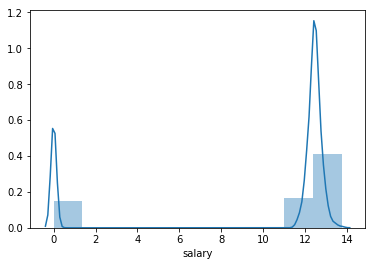

In [14]:
# Converting Salary
filter_df['salary'] = np.log1p(filter_df['salary'])
sn.distplot(filter_df['salary'], bins=10)

We will first start by printing the unique labels in categorical features

In [15]:
for f in catColumns:
    print("\nThe unique labels in {} is {}\n".format(f, filter_df[f].unique()))
    print("The values in {} is \n{}\n".format(f,  filter_df[f].value_counts()))



The unique labels in board_hsc is ['Others' 'CBSE' 'ISC']

The values in board_hsc is 
Others    247
CBSE       96
ISC        48
Name: board_hsc, dtype: int64


The unique labels in stream_hsc is ['Commerce' 'Science' 'Arts']

The values in stream_hsc is 
Commerce    222
Science     151
Arts         18
Name: stream_hsc, dtype: int64


The unique labels in course_degree is ['Science' 'Computer Applications' 'Engineering' 'Management' 'Commerce'
 'Others' 'Arts']

The values in course_degree is 
Management               163
Commerce                 117
Engineering               37
Computer Applications     32
Science                   24
Arts                      13
Others                     5
Name: course_degree, dtype: int64


The unique labels in entrance_test is ['MAT' 'NotAvailable' 'K-MAT' 'CAT' 'PGCET' 'GCET' 'G-MAT' 'XAT' 'G-SAT']

The values in entrance_test is 
MAT             265
NotAvailable     67
K-MAT            24
CAT              22
PGCET             8
GCET            

Looking at the feature **entrance_test** we will merge low val categories

**course_degree** merge others and Arts

In [16]:
filter_df['entrance_test']=np.where(filter_df['entrance_test'].isin(['PGCET', 'GCET', 'XAT', 'G-SAT', 'G-MAT']), 
                                    'Others', filter_df['entrance_test'])
filter_df.entrance_test.value_counts()

filter_df['course_degree']=np.where(filter_df['course_degree'].isin(['Others', 'Arts']), 
                                    'Others', filter_df['course_degree'])
filter_df.course_degree.value_counts()




MAT             265
NotAvailable     67
K-MAT            24
CAT              22
Others           13
Name: entrance_test, dtype: int64

Management               163
Commerce                 117
Engineering               37
Computer Applications     32
Science                   24
Others                    18
Name: course_degree, dtype: int64

We will use **groupby** function of pandas to get deeper insights of the behaviour of people **Joining** or **Not Joining** the company. We will write a generic function to report the mean by any categorical variable.

In [17]:
def group_by (categorical_features):
    return filter_df.groupby(categorical_features).mean()#agg(['mean', 'median', 'std', 'value_counts'])



In [18]:
for c in catColumns:
    group_by(c)

,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,s_test_score,salary
board_hsc,,,,,,,,,,,,
CBSE,0.354167,64.384479,0.833333,0.072917,64.091771,62.547500,0.072917,0.447917,0.843750,57.191042,57.191042,10.503417
ISC,0.354167,64.334792,0.083333,0.812500,67.300417,63.203542,0.062500,0.583333,0.770833,53.051458,53.051458,9.649906
Others,0.307692,64.818178,0.117409,0.125506,62.998907,63.110364,0.109312,0.469636,0.834008,54.424130,54.424130,9.800625


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,s_test_score,salary
stream_hsc,,,,,,,,,,,,
Arts,0.555556,55.932222,0.277778,0.222222,64.048333,58.096111,0.000000,0.888889,0.888889,51.673333,51.673333,9.590551
Commerce,0.315315,63.164820,0.288288,0.229730,66.518108,62.408649,0.004505,0.423423,0.815315,52.889955,52.889955,9.837334
Science,0.311258,67.878808,0.291391,0.145695,59.762053,64.411523,0.238411,0.509934,0.841060,58.330331,58.330331,10.170596


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,s_test_score,salary
course_degree,,,,,,,,,,,,
Commerce,0.307692,63.214957,0.273504,0.264957,66.618205,61.415897,0.0,0.478632,0.777778,52.506325,52.506325,10.063045
Computer Applications,0.281250,67.252813,0.187500,0.156250,58.672812,68.808750,0.0,0.531250,0.875000,55.956250,55.956250,9.359861
Engineering,0.270270,72.335676,0.216216,0.162162,64.970811,61.990811,1.0,0.567568,0.837838,58.705946,58.705946,10.248157
Management,0.337423,63.144233,0.349693,0.147239,62.724417,63.374049,0.0,0.368098,0.865031,55.476626,55.476626,9.825509
Others,0.555556,61.333333,0.166667,0.388889,61.166667,58.101667,0.0,0.833333,0.722222,50.913333,50.913333,9.624953
Science,0.291667,69.079167,0.291667,0.166667,64.295833,65.399583,0.0,0.750000,0.833333,58.936667,58.936667,10.891549


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,s_test_score,salary
entrance_test,,,,,,,,,,,,
CAT,0.227273,68.082727,0.272727,0.227273,66.525909,64.783636,0.090909,0.227273,1.0,56.444091,56.444091,10.341913
K-MAT,0.333333,65.344583,0.125000,0.208333,63.158333,63.880000,0.125000,0.458333,1.0,75.797083,75.797083,10.549669
MAT,0.332075,64.966943,0.309434,0.192453,64.265925,63.570792,0.094340,0.467925,1.0,68.379887,68.379887,10.046910
NotAvailable,0.343284,62.615970,0.283582,0.208955,62.757164,60.647164,0.089552,0.582090,0.0,0.000000,0.000000,9.496622
Others,0.230769,61.651538,0.230769,0.153846,56.106923,58.354615,0.076923,0.615385,1.0,22.923077,22.923077,8.681463


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,s_test_score,salary
specialization_mba,,,,,,,,,,,,
Marketing & Finance,0.297297,64.977027,0.274775,0.220721,65.510360,63.340180,0.085586,0.486486,0.819820,56.035856,56.035856,9.987947
Marketing & HR,0.378205,64.107885,0.314103,0.179487,61.628590,62.731218,0.089744,0.493590,0.833333,53.869103,53.869103,10.014939
Marketing & IB,0.153846,65.641538,0.230769,0.000000,60.507692,59.923077,0.307692,0.153846,0.923077,48.925385,48.925385,8.663337


,gender_b,percent_ssc,board_cbse,board_icse,percent_hsc,percent_degree,degree_engg,experience_yrs,s_test,percentile_et,s_test_score,salary
placement,,,,,,,,,,,,
Not Placed,0.379747,60.986835,0.240506,0.215190,62.611519,62.061266,0.088608,0.392405,0.797468,46.834937,46.834937,0.00000
Placed,0.310897,65.580481,0.301282,0.192308,64.095032,63.217147,0.096154,0.500000,0.836538,56.985929,56.985929,12.47525


### 3. Visualizing the Data


In [19]:
def hist_plot(data, group_by, xlabel,ylabel):
    pd.crosstab(data,group_by).plot(kind='density')
    plt.xlabel(xlabel, size = 14)
    plt.ylabel(ylabel, size = 14)
    plt.title('Plot', size = 18)
    plt.grid(True)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((0,x2,y1,y2))
    plt.show()
    #plt.subplot(1, 2)

board_hsc percent_ssc


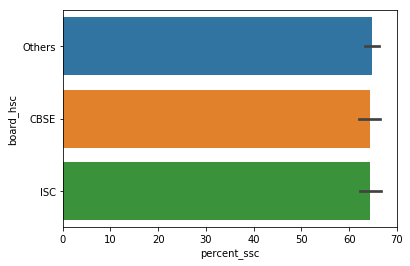

board_hsc percent_hsc


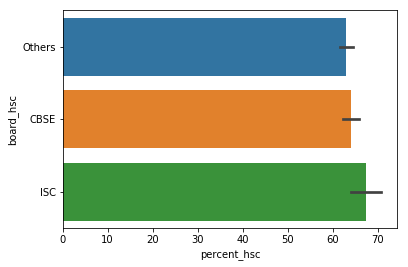

board_hsc percent_degree


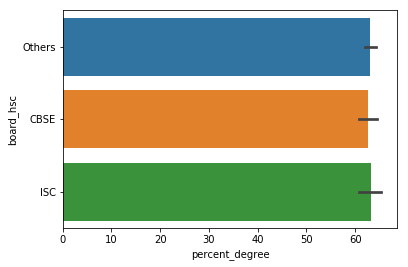

board_hsc percentile_et


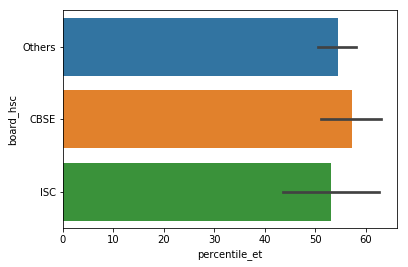

stream_hsc percent_ssc


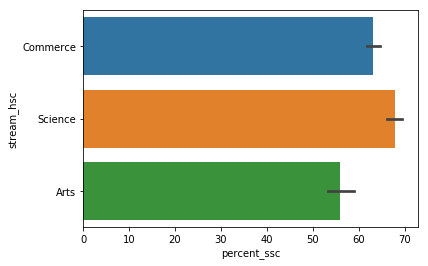

stream_hsc percent_hsc


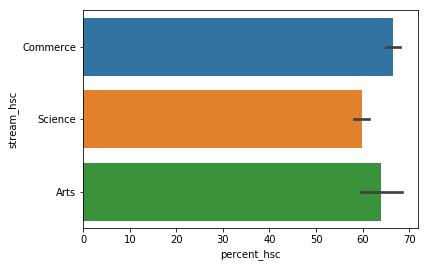

stream_hsc percent_degree


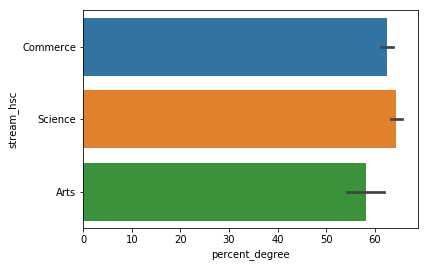

stream_hsc percentile_et


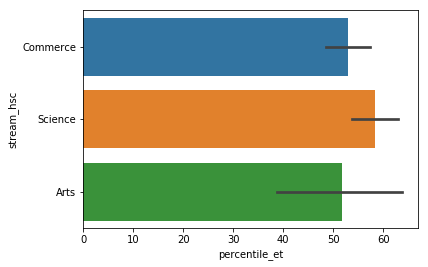

course_degree percent_ssc


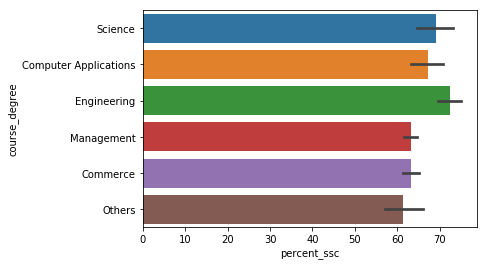

course_degree percent_hsc


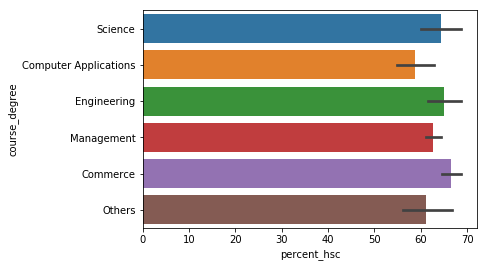

course_degree percent_degree


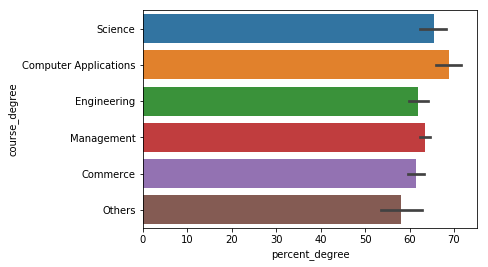

course_degree percentile_et


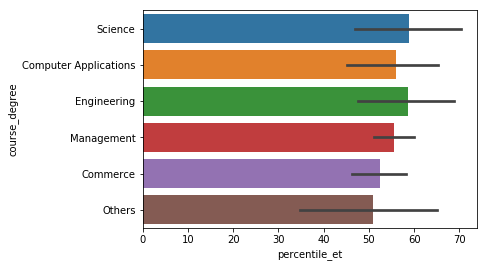

entrance_test percent_ssc


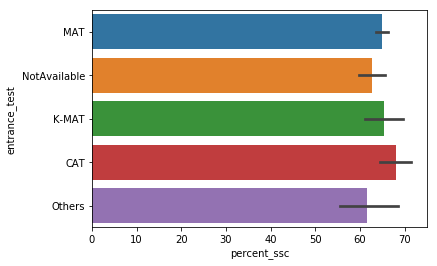

entrance_test percent_hsc


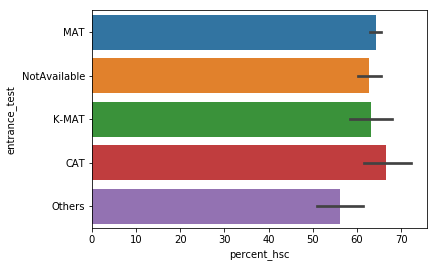

entrance_test percent_degree


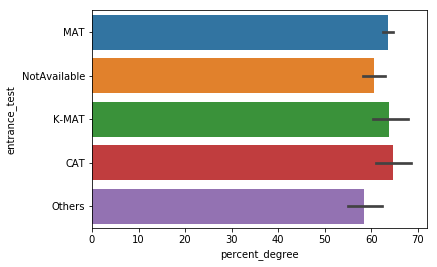

entrance_test percentile_et


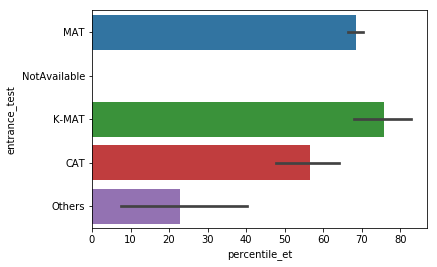

specialization_mba percent_ssc


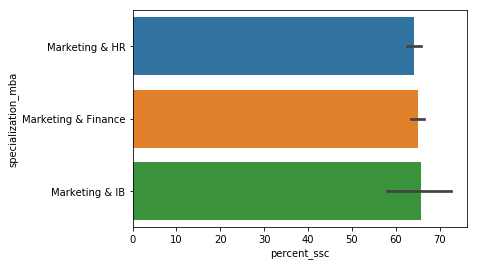

specialization_mba percent_hsc


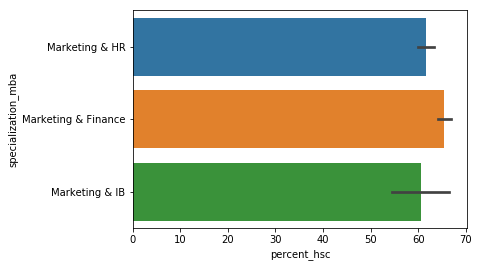

specialization_mba percent_degree


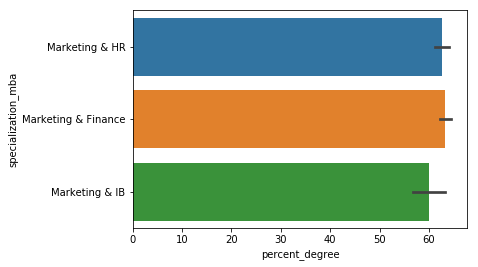

specialization_mba percentile_et


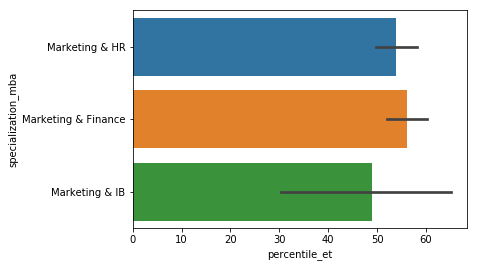

placement percent_ssc


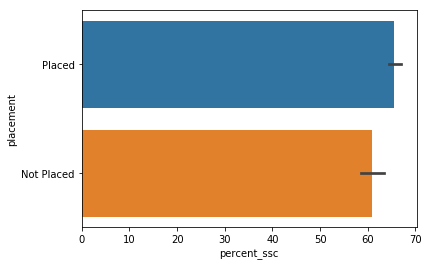

placement percent_hsc


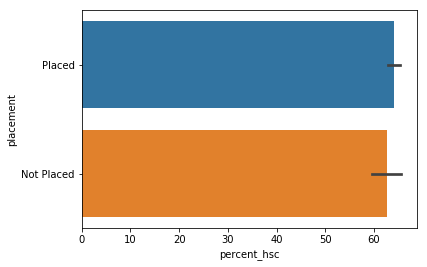

placement percent_degree


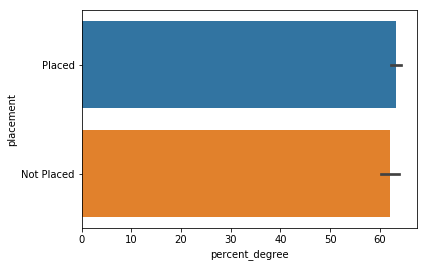

placement percentile_et


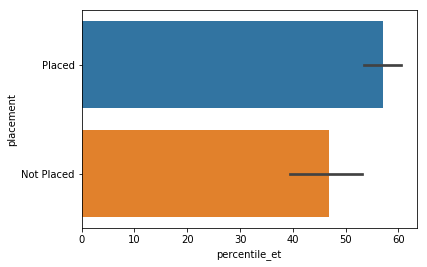

In [20]:
numerical_features_set = ['percent_ssc', 'percent_hsc', 'percent_degree',
                          'percentile_et']
categorical_features_set = catColumns

for c in categorical_features_set:
    for n in numerical_features_set:
        print(c, n)
        sn.barplot(filter_df[n], filter_df[c])
        plt.show()

#### 3b. Heatmap

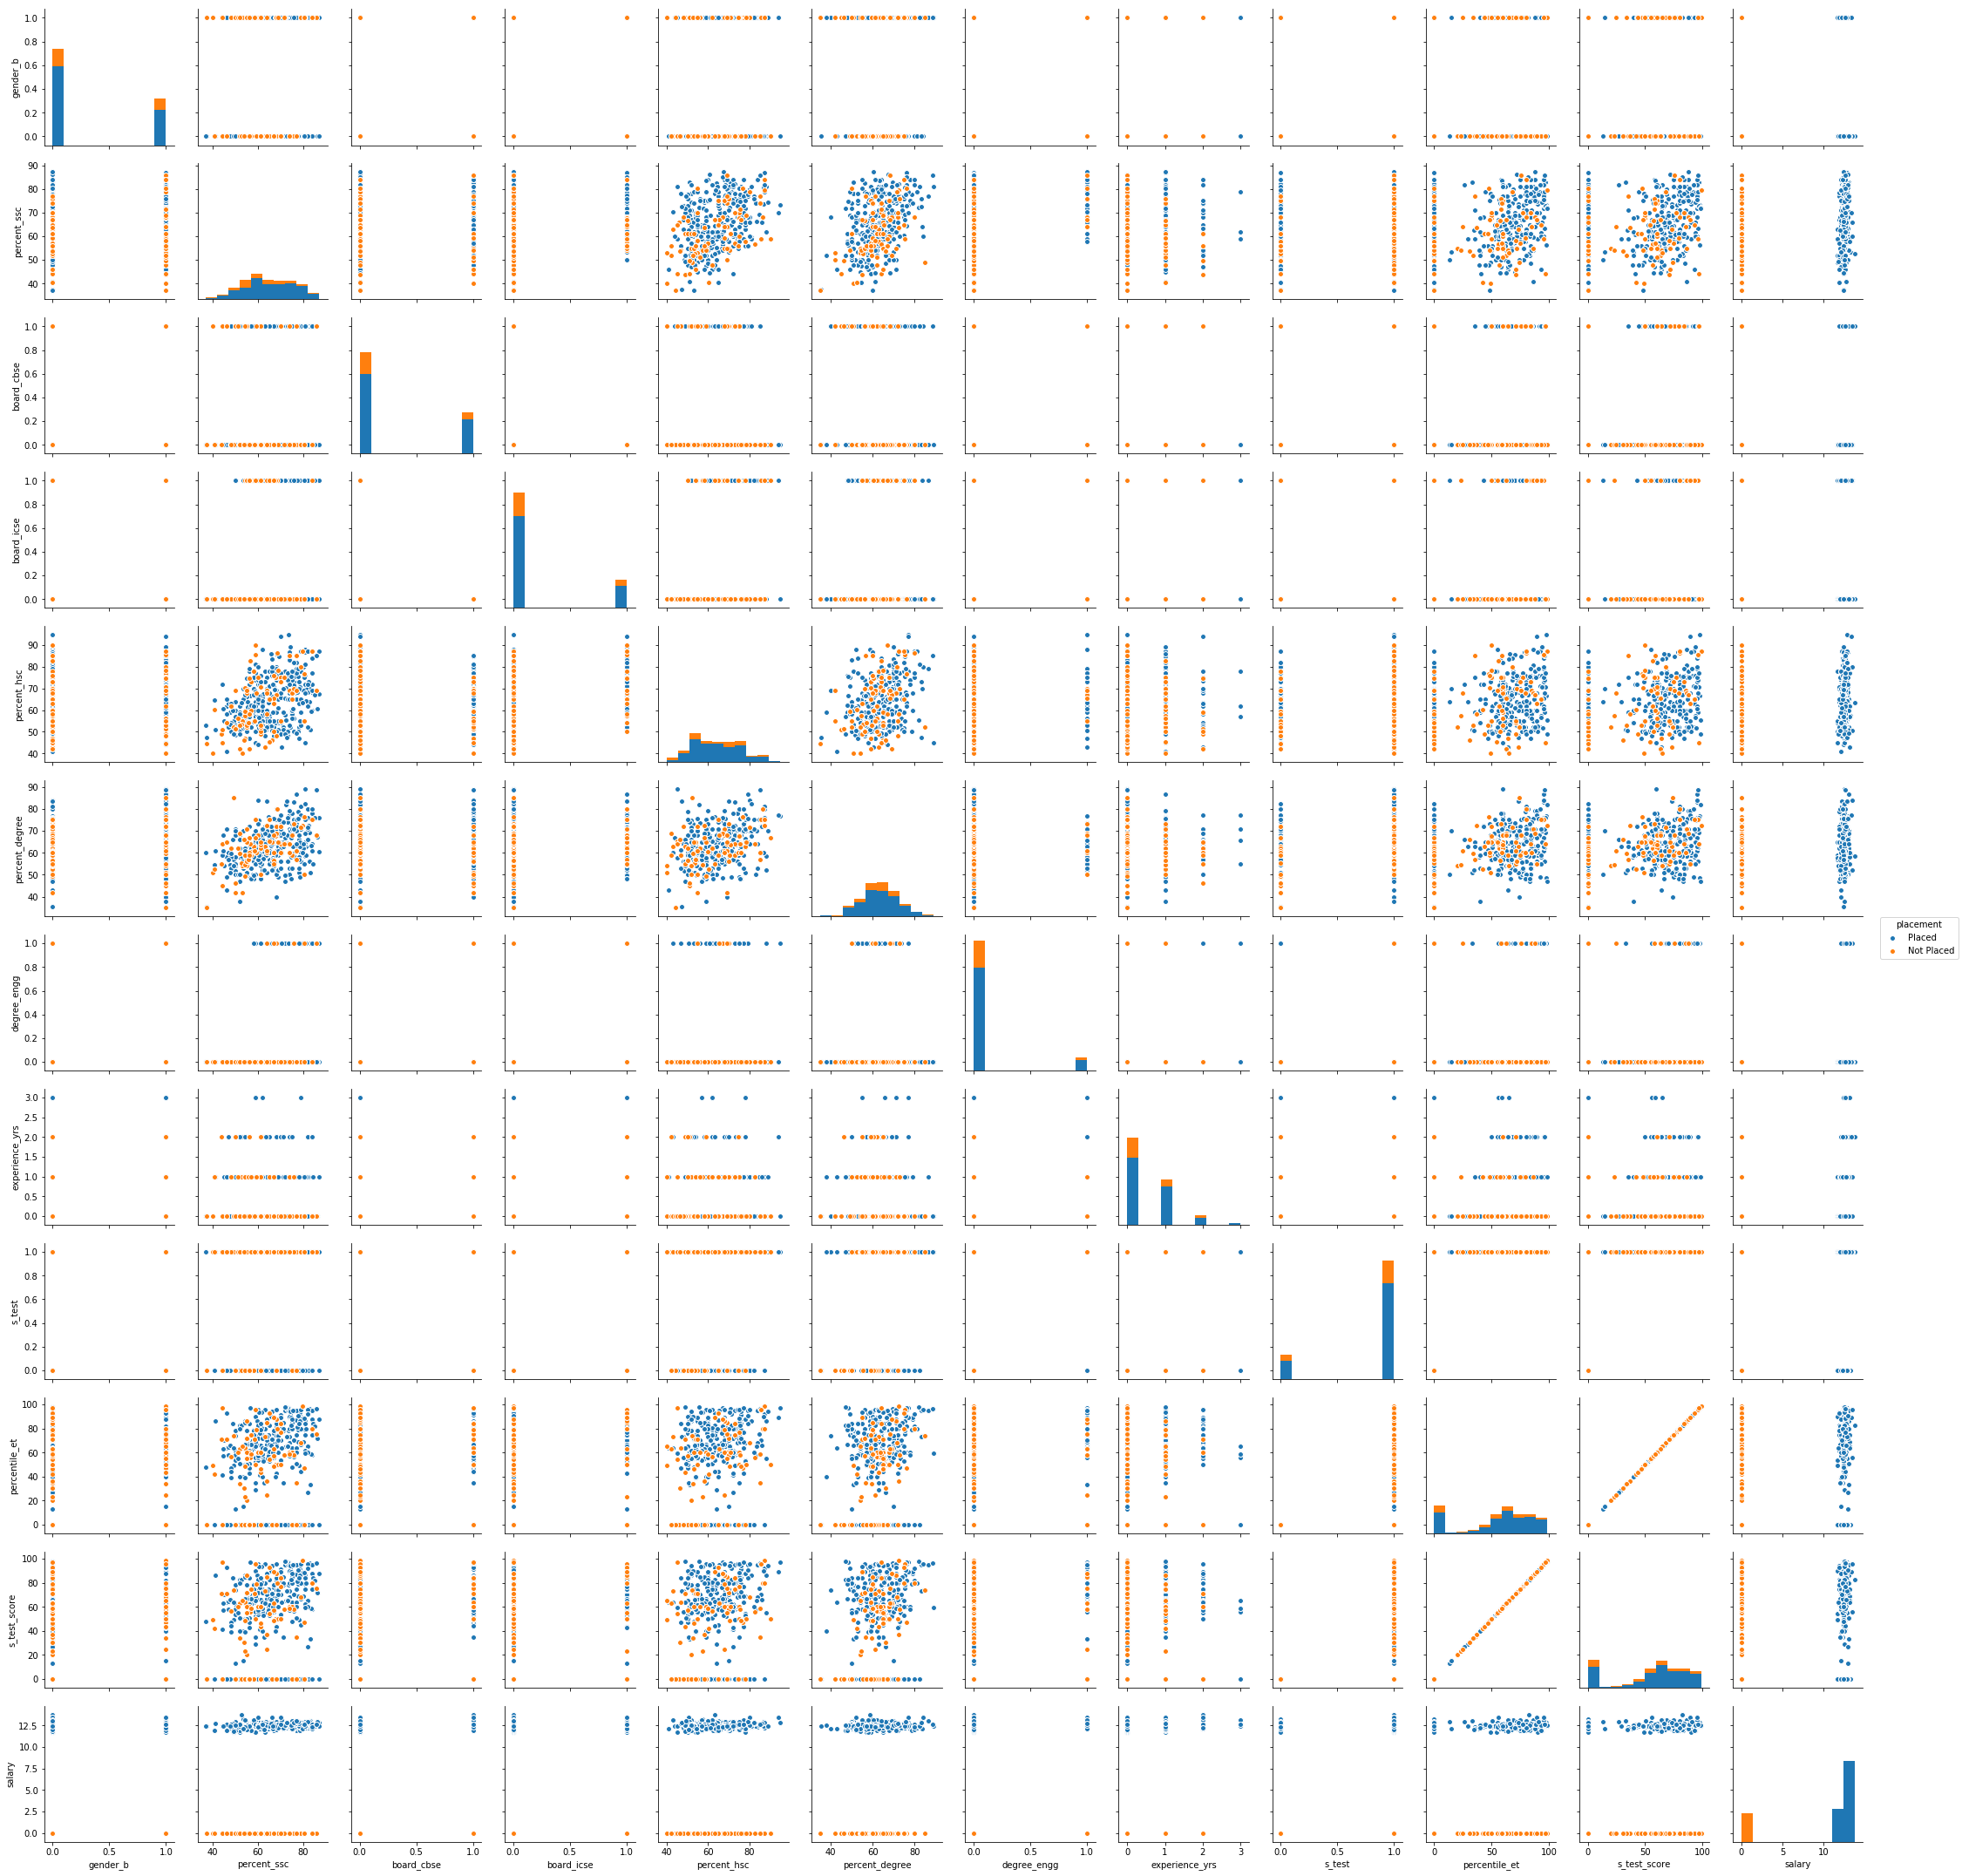

In [21]:
sn.pairplot(filter_df, hue="placement")


## More plots

The below code chunk draws a scatterplot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

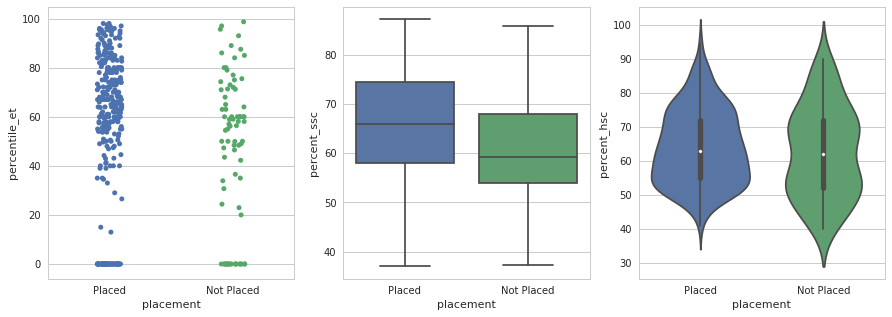

In [22]:
sn.set(style="whitegrid", color_codes=True)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sn.stripplot(x='placement', y='percentile_et', data=filter_df, jitter=True, ax = ax1)
sn.boxplot(x='placement', y='percent_ssc', data=filter_df, ax=ax2)
sn.violinplot(x='placement', y='percent_hsc', data=filter_df, ax=ax3)
# Start here


# Start Here

## Model Approach 1:  With dummy variable coding

### Dummy Variable coding

Remove the response variable from the dataset¶


In [23]:
X_features = set(filter_df.columns)
X_features = list(X_features - set(['gender', 'board_ssc', 'salary', 'placement_b', 'percent_mba',
                                   'marks_projectwork', 'percent_mba', 'marks_communication', 'marks_boca', 'specialization_mba']))

In [24]:
X_features
catColumns

['percentile_et',
 'entrance_test',
 'experience_yrs',
 'board_hsc',
 's_test',
 'degree_engg',
 'percent_hsc',
 'stream_hsc',
 'gender_b',
 's_test_score',
 'percent_ssc',
 'board_cbse',
 'percent_degree',
 'placement',
 'board_icse',
 'course_degree']

['board_hsc',
 'stream_hsc',
 'course_degree',
 'entrance_test',
 'specialization_mba',
 'placement']

In [25]:
categorical_features = ['board_hsc', 'stream_hsc', 'course_degree', 'entrance_test']

In [26]:
#for i in categorical_features:
 #   if filter_df.dtypes.name = 'category'
encoded_X_df = pd.get_dummies(filter_df[X_features], columns = categorical_features, drop_first = True )
encoded_Y_df = pd.get_dummies( filter_df['placement'], drop_first=False)

In [27]:
encoded_Y_df.head()

,Not Placed,Placed
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
pd.options.display.max_columns = None
encoded_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 25 columns):
percentile_et                          391 non-null float64
experience_yrs                         391 non-null int64
s_test                                 391 non-null int64
degree_engg                            391 non-null int64
percent_hsc                            391 non-null float64
gender_b                               391 non-null int64
s_test_score                           391 non-null float64
percent_ssc                            391 non-null float64
board_cbse                             391 non-null int64
percent_degree                         391 non-null float64
placement                              391 non-null object
board_icse                             391 non-null int64
board_hsc_ISC                          391 non-null uint8
board_hsc_Others                       391 non-null uint8
stream_hsc_Commerce                    391 non-null uint8
stream_hsc_Sci

In [29]:
Y = encoded_Y_df[['Placed']]
X = encoded_X_df
X.drop(['placement'], axis = 'columns', inplace = True)
Y.info()
X.head()
Y.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 1 columns):
Placed    391 non-null uint8
dtypes: uint8(1)
memory usage: 471.0 bytes


,percentile_et,experience_yrs,s_test,degree_engg,percent_hsc,gender_b,s_test_score,percent_ssc,board_cbse,percent_degree,board_icse,board_hsc_ISC,board_hsc_Others,stream_hsc_Commerce,stream_hsc_Science,course_degree_Computer Applications,course_degree_Engineering,course_degree_Management,course_degree_Others,course_degree_Science,entrance_test_K-MAT,entrance_test_MAT,entrance_test_NotAvailable,entrance_test_Others
0,55.0,0,1,0,88.00,0,55.0,62.00,0,52.00,0,0,1,1,0,0,0,0,0,1,0,1,0,0
1,86.5,1,1,0,75.33,0,86.5,76.33,0,75.48,1,0,1,0,1,1,0,0,0,0,0,1,0,0
2,0.0,0,0,1,78.00,0,0.0,72.00,0,66.63,0,0,1,1,0,0,1,0,0,0,0,0,1,0
3,75.0,0,1,0,63.00,0,75.0,60.00,1,58.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,66.0,1,1,1,55.00,0,66.0,61.00,1,54.00,0,1,0,0,1,0,1,0,0,0,0,1,0,0


Placed    312
dtype: int64

### Correlation amongst variable

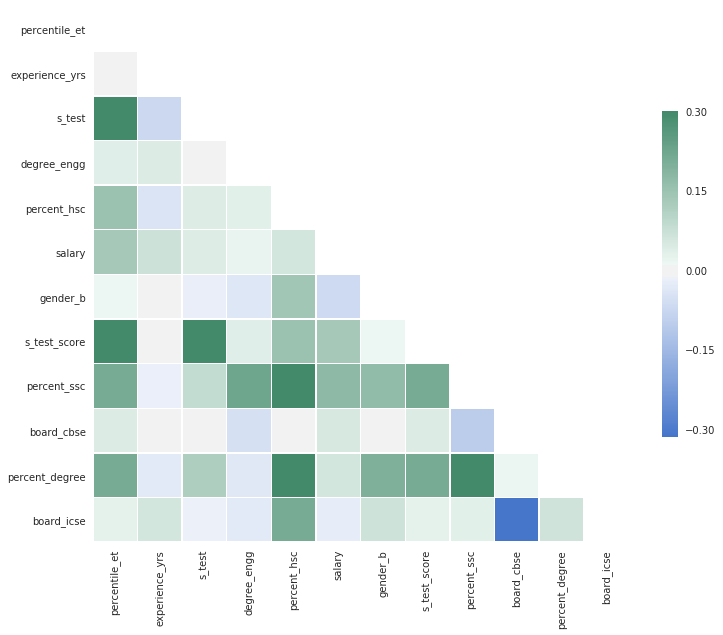

In [30]:
corr = filter_df.filter(numColumns).corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(255, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [31]:
# Add a few features and test significance
X['high_ssc_score'] = 0
X.loc[X['percent_ssc'] > 65, 'high_ssc_score'] = 1
X['high_cbsc_ssc_score'] = X['high_ssc_score'] * X['board_cbse']
X['high_cbsc_ssc_score'] = X['high_ssc_score'] * X['board_icse']
X['high_hsc_score'] = 0
X.loc[X['percent_hsc'] > 60, 'high_hsc_score'] = 1
X['high_cbsc_hsc_score'] = X['high_hsc_score'] * X['board_cbse']
X['high_cbsc_hsc_score'] = X['high_hsc_score'] * X['board_icse']
X['high_deg_score'] = 0
X.loc[X['percent_degree'] > 65, 'high_deg_score'] = 1
X['high_et_score'] = 0
X.loc[X['percentile_et'] > 55, 'high_et_score'] = 1

X['low_score_1'] = X['high_ssc_score'] * X['high_hsc_score'] 
X['low_score_2'] = X['high_ssc_score'] * X['high_hsc_score'] * X['high_deg_score']
X['low_score_3'] = X['high_ssc_score'] * X['high_hsc_score'] * X['high_deg_score'] * X['high_et_score']
X['low_score_4'] = X['high_ssc_score'] * X['high_et_score']
X['low_score_5']=  X['high_hsc_score'] * X['high_et_score']
X['low_score_6'] = X['high_deg_score'] * X['high_et_score']
X['low_score_7'] = X['low_score_1'] * X['experience_yrs']

X['low_score_9'] = X['gender_b']  * X['high_et_score']

X['dt1'] = 0
X.loc[(X['percent_hsc'] > 47.17) & (X['s_test_score'] <= 60.5) & 
        (X['percent_hsc'] <= 84) , 'dt1'] =1

X['dt2'] = 0
X.loc[(X['percent_hsc'] > 47.17) & (X['s_test_score'] > 60.5) & 
        (X['high_cbsc_hsc_score'] <= 0.5) , 'dt2'] =1

X['dt3'] = 0
X.loc[(X['percent_hsc'] <= 47.17) & (X['percent_ssc'] <= 68.12), 'dt3'] =1

X['dt4'] = 0
X.loc[(X['percent_degree'] <= 60.1) & (X['percent_ssc'] <= 51) & (X['board_cbse'] == 0), 'dt4'] =1

X['dt5'] = 0
X.loc[(X['s_test_score'] > 60.5 ) &  (X['percentile_et'] <= 98.35) & 
      (X['percent_hsc'] <= 62.5) & (X['percent_ssc'] <= 47.3), 'dt5'] =1


X['dt6'] = 0
X.loc[(X['percent_hsc'] <= 46.65) & (X['percent_ssc'] <= 68.12) & 
        (X['entrance_test_NotAvailable'] == 0) & (X['percent_degree'] <= 47.0), 'dt6'] =1

X['dt7'] = 0
X.loc[(X['percent_hsc'] > 46.65) & (X['s_test_score'] <= 58.03) & 
        (X['percent_degree'] <= 49.5), 'dt7'] =1

X['dt8'] = 0
X.loc[(X['percent_hsc'] > 46.65) & (X['s_test_score'] > 58.03) & 
        (X['percent_degree'] > 49.5) & (X['percent_degree'] <= 68.5), 'dt8'] =1


X['dt9'] = X['percent_hsc'] * X['board_cbse']
X['dt9'] = X['dt9'] - X['dt9'].mean()
X['dt10'] = X['percent_hsc'] * X['board_icse']
X['dt10'] = X['dt10'] -X['dt10'].mean()
X['dt11'] = X['percent_ssc'] * X['board_cbse']
X['dt11'] = X['dt11'] - X['dt11'].mean()
X['dt12'] = X['percent_ssc'] * X['board_icse']
X['dt12'] = X['dt12'] - X['dt12'].mean()



X['dt13'] = X['percent_degree'] * X['percent_hsc'] * X['percent_ssc'] * (X['percentile_et'] + 1)
X['dt14'] = X['dt13'] * X['gender_b']
X['dt15'] = X['dt2'] * X['gender_b']
X['dt16'] = X['percentile_et'] * X['gender_b']
X['dt17'] = 1
X.loc[X['experience_yrs'] > 0,  'dt17'] = 0
X['dt18'] = X['dt17'] * X['dt3']


X.columns
X.head()


cols = ['s_test', 'degree_engg', 'board_icse', 'experience_yrs', 'gender_b',
       'board_cbse', 'percent_degree', 'percentile_et', 'percent_hsc',
       'percent_ssc', 's_test_score']
#from sklearn.preprocessing import MinMaxScaler

#scl = MinMaxScaler()

#for c in cols:
#    X[c] = scl.fit_transform(X[c].reshape(-1,1))
#    print(c)

Index(['percentile_et', 'experience_yrs', 's_test', 'degree_engg',
       'percent_hsc', 'gender_b', 's_test_score', 'percent_ssc', 'board_cbse',
       'percent_degree', 'board_icse', 'board_hsc_ISC', 'board_hsc_Others',
       'stream_hsc_Commerce', 'stream_hsc_Science',
       'course_degree_Computer Applications', 'course_degree_Engineering',
       'course_degree_Management', 'course_degree_Others',
       'course_degree_Science', 'entrance_test_K-MAT', 'entrance_test_MAT',
       'entrance_test_NotAvailable', 'entrance_test_Others', 'high_ssc_score',
       'high_cbsc_ssc_score', 'high_hsc_score', 'high_cbsc_hsc_score',
       'high_deg_score', 'high_et_score', 'low_score_1', 'low_score_2',
       'low_score_3', 'low_score_4', 'low_score_5', 'low_score_6',
       'low_score_7', 'low_score_9', 'dt1', 'dt2', 'dt3', 'dt4', 'dt5', 'dt6',
       'dt7', 'dt8', 'dt9', 'dt10', 'dt11', 'dt12', 'dt13', 'dt14', 'dt15',
       'dt16', 'dt17', 'dt18'],
      dtype='object')

,percentile_et,experience_yrs,s_test,degree_engg,percent_hsc,gender_b,s_test_score,percent_ssc,board_cbse,percent_degree,board_icse,board_hsc_ISC,board_hsc_Others,stream_hsc_Commerce,stream_hsc_Science,course_degree_Computer Applications,course_degree_Engineering,course_degree_Management,course_degree_Others,course_degree_Science,entrance_test_K-MAT,entrance_test_MAT,entrance_test_NotAvailable,entrance_test_Others,high_ssc_score,high_cbsc_ssc_score,high_hsc_score,high_cbsc_hsc_score,high_deg_score,high_et_score,low_score_1,low_score_2,low_score_3,low_score_4,low_score_5,low_score_6,low_score_7,low_score_9,dt1,dt2,dt3,dt4,dt5,dt6,dt7,dt8,dt9,dt10,dt11,dt12,dt13,dt14,dt15,dt16,dt17,dt18
0,55.0,0,1,0,88.00,0,55.0,62.00,0,52.00,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-18.426752,-13.525499,-18.184731,-12.880051,1.588787e+07,0.0,0,0.0,1,0
1,86.5,1,1,0,75.33,0,86.5,76.33,0,75.48,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,-18.426752,61.804501,-18.184731,63.449949,3.797547e+07,0.0,0,0.0,0,0
2,0.0,0,0,1,78.00,0,0.0,72.00,0,66.63,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-18.426752,-13.525499,-18.184731,-12.880051,3.741941e+05,0.0,0,0.0,1,0
3,75.0,0,1,0,63.00,0,75.0,60.00,1,58.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,44.573248,-13.525499,41.815269,-12.880051,1.666224e+07,0.0,0,0.0,1,0
4,66.0,1,1,1,55.00,0,66.0,61.00,1,54.00,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,36.573248,-13.525499,42.815269,-12.880051,1.213839e+07,0.0,0,0.0,0,0


### Train and test data split using Python

The train and test split can also be done using the **sklearn module**

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42)
y_train.head()


,Placed
63,0
338,1
354,0
219,0
84,1


## Model Building: Using the **statsmodel.api** 



/home/sayantan/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:62: UserWarning: Error while trying to convert the column "board_hsc_ISC". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))
/home/sayantan/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:62: UserWarning: Error while trying to convert the column "board_hsc_Others". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))
/home/sayantan/anaconda2/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:62: UserWarning: Error while trying to convert the column "stream_hsc_Commerce". Fall back to string conversion. The error is: Cannot convert numpy array of unsigned values -- R does not have unsigned integers.
  (name, str(e)))
/home/sayantan/anaconda2/envs/py36/lib/python3.6/sit

Classes ‘data.table’ and 'data.frame':	312 obs. of  56 variables:
 $ percentile_et                      : num  0 85 0 84 67 0 60 69 64 55 ...
 $ experience_yrs                     : int  0 0 2 0 0 0 1 1 0 1 ...
 $ s_test                             : int  0 1 0 1 1 1 1 1 1 1 ...
 $ degree_engg                        : int  0 0 0 0 0 1 0 1 0 0 ...
 $ percent_hsc                        : num  55 56 42 73 66.1 ...
 $ gender_b                           : int  0 0 0 0 0 1 0 0 0 0 ...
 $ s_test_score                       : num  0 85 0 84 67 0 60 69 64 55 ...
 $ percent_ssc                        : num  53 75 56 70 59.4 ...
 $ board_cbse                         : int  0 0 0 1 1 0 1 0 0 1 ...
 $ percent_degree                     : num  42 53 59 64 58.2 50 64 59 54 59 ...
 $ board_icse                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ board_hsc_ISC                      : int  0 0 1 0 0 0 0 0 0 0 ...
 $ board_hsc_Others                   : int  1 1 0 1 0 1 0 1 1 1 ...
 $ stream_hsc_Com

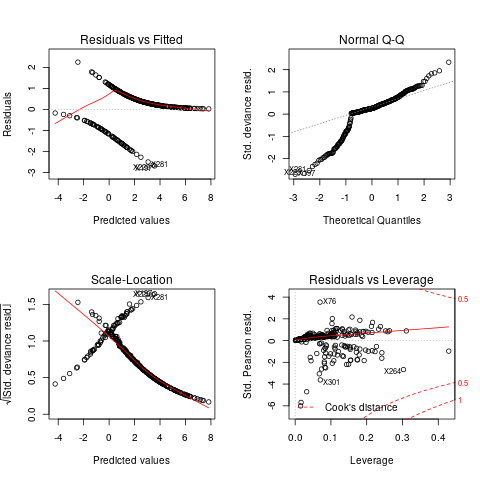

In [130]:
%%R -i X_train -i y_train
library(caret)
library(data.table)

X_train = as.data.table(X_train)

changeCols <- colnames(X_train)[which(as.vector(X_train[,lapply(.SD, class)]) == "character")]

X_train[,(changeCols):= lapply(.SD, as.integer), .SDcols = changeCols]


y_train$placement = as.factor(y_train$Placed)
set.seed(766)
#X_train$board_hsc_ISC = as.integer(X_train$board_hsc_ISC)
#X_train$board_hsc_Others = as.integer(X_train$board_hsc_Others)
#X_train$stream_hsc_Commerce = as.integer(X_train$stream_hsc_Commerce)
#X_train$stream_hsc_Science = as.integer(X_train$stream_hsc_Science)
#X_train$course_degree_Computer.Applications = as.integer(X_train$course_degree_Computer.Applications)
#X_train$course_degree_Engineering = as.integer(X_train$course_degree_Engineering)
#X_train$course_degree_Management = as.integer(X_train$course_degree_Management)
#X_train$course_degree_Others = as.integer(X_train$course_degree_Others)
#X_train$course_degree_Science = as.integer(X_train$course_degree_Science)
#X_train$entrance_test_K.MAT = as.integer(X_train$entrance_test_K.MAT)
#X_train$entrance_test_MAT = as.integer(X_train$entrance_test_MAT)
#X_train$entrance_test_NotAvailable = as.integer(X_train$entrance_test_NotAvailable)
#X_train$entrance_test_Others = as.integer(X_train$entrance_test_Others)
#X_train$high_et_score = as.integer(X_train$high_et_score)

print(str(X_train))

X_train = as.data.frame(X_train)
y_train = as.data.frame(y_train)

levels(y_train$placement) <- make.names(levels(factor(y_train$placement)))

objControl <- trainControl(method = "none", returnResamp = 'final',
                           summaryFunction = twoClassSummary,
                           #summaryFunction = twoClassSummary, defaultSummary
                           classProbs = TRUE,
                           savePredictions = TRUE)

lgCaretModel <- train(X_train,
                      y_train$placement,
                      method = 'glmStepAIC',
                      trControl = objControl,
                      metric = "ROC",
                      verbose = TRUE)


plot(varImp(lgCaretModel, scale = TRUE))

print(summary(lgCaretModel))
par(mfrow = c(2, 2)) 
print(plot(lgCaretModel$finalModel))

caretPredictedClass = predict(object = lgCaretModel, X_train, type = 'raw')
confusionMatrix(caretPredictedClass,y_train$placement)


In [131]:
# Get the equation from above and build model
#from sklearn.preprocessing import LabelEncoder
#lbl = LabelEncoder()
#lbl.fit(y_train.placement)
#y = lbl.transform(y_train.placement)
#y_t =lbl.transform(y_test.placement)

cols4logit = ['percent_degree' , 'percent_ssc' , 'degree_engg' ,
              'high_cbsc_ssc_score' , 'high_cbsc_hsc_score'  ,
              'high_deg_score' , 'low_score_1' , 'low_score_3' , 'low_score_7' , 'low_score_9',
             'dt2', 'dt3', 'dt4', 'dt5', 'dt7', 'dt8', 'dt10', 'dt13', 'dt15']

import statsmodels.api as sm
lg_model_1 = sm.GLM(y_train, sm.add_constant(X_train[cols4logit]),family=sm.families.Binomial()).fit()

lg_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Placed   No. Observations:                  312
Model:                            GLM   Df Residuals:                      292
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -109.85
Date:                Mon, 20 Aug 2018   Deviance:                       219.70
Time:                        21:46:24   Pearson chi2:                     312.
No. Iterations:                     6                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.8531      2.758      0.672      0.502      -3.552       7.258
percent_degree         -0.0797      0.041     -1.932      0.053      -0.161       0.001
percent_ssc             0.0705      0.030      2.366      0.018       0.012       0.129
degree_engg            -1.2249      0.608     -2.016      0.044      -2.416      -0.034
high_cbsc_ssc_score     2.4470      0.911      2.686      0.007       0.661       4.233
high_cbsc_hsc_score     1.5440      1.026      1.504      0.133      -0.468       3.556
high_deg_score          1.7880      0.646      2.766      0.006       0.521       3.055
low_score_1            -2.0422      0.656     -3.114      0.002      -3.328      -0.757
low_score_3            -1.3968      0.840     -1.662      0.097      -3.044       0.251
low_score_7             2.2351      0.799      2.798      0.005       0.670       3.801
low_score_9             0.8472      0.627      1.351      0.177      -0.382       2.076
dt2                     3.8911      0.809      4.813      0.000       2.306       5.476
dt3                    -3.8304      0.944     -4.058      0.000      -5.680      -1.980
dt4                     1.9057      1.004      1.898      0.058      -0.062       3.873
dt5                    -2.9088      1.231     -2.362      0.018      -5.322      -0.495
dt7                    -3.2039      1.060     -3.023      0.003      -5.281      -1.126
dt8                    -0.8142      0.486     -1.675      0.094      -1.767       0.139
dt10                   -0.0303      0.013     -2.375      0.018      -0.055      -0.005
dt13                -5.138e-08   2.71e-08     -1.895      0.058   -1.05e-07    1.75e-09
dt15                   -1.9398      1.068     -1.816      0.069      -4.034       0.154
=======================================================================================
"""

### 1. The prediction on train data.
Two ways to precit the outcome on the **train set**
> * Use **predict** function of the model object 
* Use **get_prediction** function of the model object

For the model with dummy variable coding explicetely done, we need to add the constant term to the test set. For the model with dummy variable coding carried out automatically, there is no need to add the constant term to the test set.

Below is the output from model with dummy variable coding

In [132]:
train_df_predict_1 = lg_model_1.predict(sm.add_constant(X_train[cols4logit]))
train_df_predict_1.head()


63     0.364338
338    0.995602
354    0.088897
219    0.846301
84     0.983573
dtype: float64

### 2. The prediction on test data.

The prediction can be carried out by **defining functions** as well. Below is one such instance wherein a function is defined and is used for prediction

In [133]:
def get_predictions ( test_class, model, test_data ):
    y_pred_df = pd.DataFrame( { 'actual': test_class,
                               'predicted_prob': model.get_prediction(sm.add_constant(test_data)).predicted_mean})
    return y_pred_df

Giving label to the Y column of the test set by using the dictionary data type in python. This is being done for the model which was built using dummy variable coding. It will be used to generate confusion matrix at a later time

In [134]:
ser = y_test
status_dict = {1:"Placed", 0:"NPlaced"}
class_test_df = ser.replace(dict(NotPlaced=status_dict))
class_test_df.rename({'NotPlaced': 'status'}, axis='columns', inplace=True )
class_test_df.info()
class_test_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 9 to 261
Data columns (total 1 columns):
Placed    79 non-null uint8
dtypes: uint8(1)
memory usage: 711.0 bytes


,Placed
9,1
42,0
33,1
312,1
370,1
373,1
55,1
320,1
246,1
113,1


In [135]:
model_1_pred_test_df = pd.DataFrame(get_predictions(y_test['Placed'], lg_model_1, X_test[cols4logit]))
model_1_pred_test_df.head()

,actual,predicted_prob
9,1,0.846671
42,0,0.609997
33,1,0.603307
312,1,0.966437
370,1,0.994450


In [136]:
model_1_pred_test_df['predicted'] = model_1_pred_test_df.predicted_prob.map(lambda x: 1 if x > 0.69 else 0)
model_1_pred_test_df[0:10]

,actual,predicted_prob,predicted
9,1,0.846671,1
42,0,0.609997,0
33,1,0.603307,0
312,1,0.966437,1
370,1,0.994450,1
373,1,0.893683,1
55,1,0.727840,1
320,1,0.454691,0
246,1,0.867758,1
113,1,0.908254,1


### 3. Confusion Matrix

We will built classification matrix using the **metrics** method from **sklearn** package. We will also write a custom function to build a classification matrix and use it for reporting the performance measures.

#### 3a. Confusion Matrix using sklearn

In [137]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [138]:
print("The model 1 with dummy variable coding output: ")
confusion_matrix(y_train['Placed'], train_df_predict_1.values >= 0.69)
model_1_report = (classification_report(class_test_df, model_1_pred_test_df.predicted))
#print(model_1_report)


The model 1 with dummy variable coding output: 


array([[ 48,  18],
       [ 34, 212]])

#### 3b Confusion Matrix using generic function

In [139]:
def draw_cm( actual, predicted ):
    plt.figure(figsize=(9,9))
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.0f', cmap = 'Blues_r')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Classification Matrix Plot', size = 15);
    plt.show()

The classification matrix plot as reported by **model 1**  with dummy variable coding is:

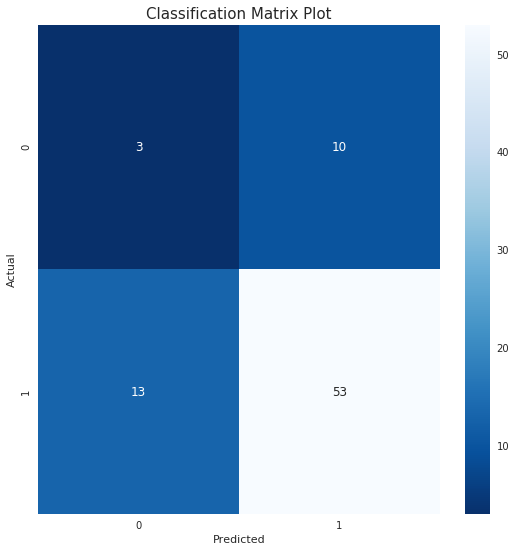

In [140]:
draw_cm( model_1_pred_test_df.actual, model_1_pred_test_df.predicted )

### 4. Performance Measure on the test set


In [141]:
def measure_performance (clasf_matrix):
    measure = pd.DataFrame({
                        'sensitivity': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)], 
                        'specificity': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'recall': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)],
                        'precision': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[1,0]),2)],
                        'overall_acc': [round((clasf_matrix[0,0]+clasf_matrix[1,1])/
                                              (clasf_matrix[0,0]+clasf_matrix[0,1]+clasf_matrix[1,0]+clasf_matrix[1,1]),2)]
                       })
    return measure

In [142]:
cm = metrics.confusion_matrix(model_1_pred_test_df.actual, model_1_pred_test_df.predicted)

model_1_metrics_df = pd.DataFrame(measure_performance(cm))
model_1_metrics_df

print( 'Total Accuracy sklearn: ',np.round( metrics.accuracy_score( model_1_pred_test_df.actual, 
                                                                   model_1_pred_test_df.predicted ), 2 ) )

,overall_acc,precision,recall,sensitivity,specificity
0,0.71,0.19,0.23,0.23,0.8


Total Accuracy sklearn:  0.71



### 5. The optimal cut-off

We are going to use model 2 without dummy variable coding to select the optimal cut-off. 

> As an exercise, participants can change the code to find the optimal cut-off using model 1 and compare the outcome



#### Select the optimal cut-off value, if:

> 1. Cost of Mis-classifying Not Joined as Joined is twice as costly as cost of micalssifying Joined as Not Joined
2. Both sensitivity and specificity are equally important

The best cut-off is the one which minimizes the misclassification cost (in case of **_option 1_**) or which maximizes the Youden's Index (in case of **_Option 2_**).

In [143]:
lg_pred_prob_df = lg_model_1.predict(sm.add_constant(X_train[cols4logit]))
n = len(X_train)

costs =  pd.DataFrame.from_items([('Placed', [0,1]), ('Not Placed', [2,0])],
                    orient='index', columns=['Placed', 'Not Placed'])

print(costs)
costs.iloc[0][1] #to refer to specific value at a given position

            Placed  Not Placed
Placed           0           1
Not Placed       2           0


1


Defining loop function to loop through float values


In [144]:
def frange(start, stop, step):
     s = start
     while s < stop:
         yield s
         s += step

In [145]:
#creating empty vectors to store the results.
cutoff = []
P11 = [] #correct classification of positive as positive
P00 = [] #correct classification of negative as negative
P10 = [] #misclassification of positive class to negative class
P01 = [] #misclassification of negative class to positive class


for i in frange(0.00, 1, 0.05):
    predicted_y = lg_pred_prob_df.map(lambda x: 1 if x > i else 0)
    tbl = metrics.confusion_matrix(y_train.Placed, predicted_y)
    if ( i <= 1):
        j = int(20*i)
        P10.append(tbl[1,0]/(tbl[1,0] + tbl[1,1]))
        P11.append(tbl[1,1]/(tbl[1,0] + tbl[1,1]))
        P01.append(tbl[0,1]/(tbl[0,0] + tbl[0,1]))
        P00.append(tbl[0,0]/(tbl[0,0] + tbl[0,1]))
        cutoff.append(i)

d = {'cutoff':cutoff,'P10':P10,'P01': P01,'P00': P00,'P11':P11}
df_cost_table = pd.DataFrame(d, columns=['cutoff','P00','P01','P10','P11'])

In [146]:
df_cost_table

,cutoff,P00,P01,P10,P11
0,0.00,0.000000,1.000000,0.000000,1.000000
1,0.05,0.030303,0.969697,0.000000,1.000000
2,0.10,0.060606,0.939394,0.000000,1.000000
3,0.15,0.106061,0.893939,0.004065,0.995935
4,0.20,0.166667,0.833333,0.004065,0.995935
5,0.25,0.212121,0.787879,0.008130,0.991870
6,0.30,0.272727,0.727273,0.012195,0.987805
7,0.35,0.303030,0.696970,0.012195,0.987805
8,0.40,0.363636,0.636364,0.020325,0.979675
9,0.45,0.393939,0.606061,0.040650,0.959350



The table summarizing the optimal cut-off value:

_write the cost.table into a csv file_


In [147]:
df_cost_table['msclaf_cost'] = df_cost_table.P01*costs.iloc[0][1]+df_cost_table.P10*costs.iloc[1][0]
df_cost_table['youden_index'] = df_cost_table.P00+df_cost_table.P11 -1
df_cost_table

#write to csv
#df_cost_table.to_csv("optimal_Cutoff_caret.csv", sep=',')
#os.getcwd()

,cutoff,P00,P01,P10,P11,msclaf_cost,youden_index
0,0.00,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
1,0.05,0.030303,0.969697,0.000000,1.000000,0.969697,0.030303
2,0.10,0.060606,0.939394,0.000000,1.000000,0.939394,0.060606
3,0.15,0.106061,0.893939,0.004065,0.995935,0.902069,0.101996
4,0.20,0.166667,0.833333,0.004065,0.995935,0.841463,0.162602
5,0.25,0.212121,0.787879,0.008130,0.991870,0.804139,0.203991
6,0.30,0.272727,0.727273,0.012195,0.987805,0.751663,0.260532
7,0.35,0.303030,0.696970,0.012195,0.987805,0.721360,0.290835
8,0.40,0.363636,0.636364,0.020325,0.979675,0.677014,0.343311
9,0.45,0.393939,0.606061,0.040650,0.959350,0.687361,0.353289



### 5. Confusion Matrix using Optimal Cut-off

The probability value along with the optimal cut-off can be used to build confusion matrix. We will use the **draw_cm** and **performance_measure** functions defined previously to report the performance of the model.

In [148]:
model_1_pred_test_df['predicted'] = model_1_pred_test_df.predicted_prob.map(lambda x: 1 if x > 0.85 else 0) 
model_1_pred_test_df[0:10]

,actual,predicted_prob,predicted
9,1,0.846671,0
42,0,0.609997,0
33,1,0.603307,0
312,1,0.966437,1
370,1,0.994450,1
373,1,0.893683,1
55,1,0.727840,0
320,1,0.454691,0
246,1,0.867758,1
113,1,0.908254,1


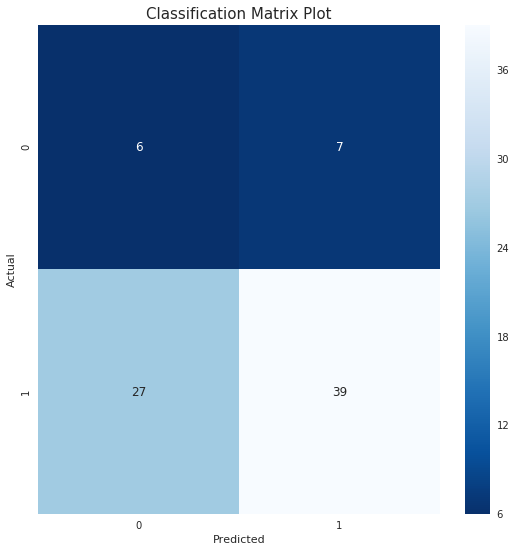

In [149]:
draw_cm( model_1_pred_test_df.actual, model_1_pred_test_df.predicted )

In [150]:
cm = metrics.confusion_matrix(model_1_pred_test_df.actual, model_1_pred_test_df.predicted)

pd.DataFrame(measure_performance(cm))

,overall_acc,precision,recall,sensitivity,specificity
0,0.57,0.18,0.46,0.46,0.59




### 6. ROC Plot on the test data

ROCR package can be used to evaluate the model performace on the test data. The same package can also be used to get the model performace on the test data.



In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

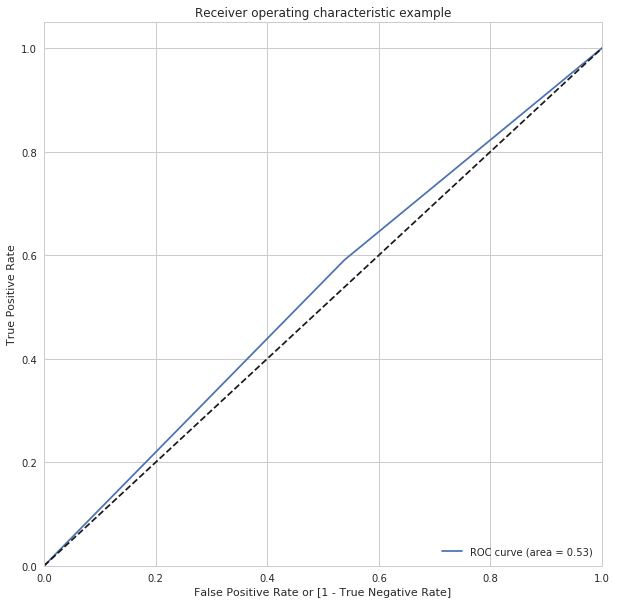

In [152]:
fpr, tpr, thresholds = draw_roc(model_1_pred_test_df.actual, model_1_pred_test_df.predicted)

In [153]:
auc_score = metrics.roc_auc_score( model_1_pred_test_df.actual, model_1_pred_test_df.predicted_prob  )
round( float( auc_score ), 2 )

0.59


#### End of Document

***
***


In [154]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(12345)
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
y = Y#lbl.fit_transform(X.placement)

#list(set(encoded_X_df.columns) - set(['placement']))
     
dtree=DecisionTreeClassifier(max_depth = 4)
clf = dtree.fit(encoded_X_df,y)#[list(set(encoded_X_df.columns) - set(['placement']))],y)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(clf, out_file=None, feature_names=encoded_X_df.columns,#[list(set(encoded_X_df.columns) - set(['placement']))].columns, 
                           class_names=True,
                           filled=True, rounded=True,  
                           special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("plot") 

'plot.pdf'

In [155]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(12345)
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

    
dtree=DecisionTreeClassifier(max_depth = 3)
lg_model_1 = dtree.fit(X_train,y_train)
train_df_predict_1 = lg_model_1.predict_proba(X_test)[:,1]

X_test.shape
finTab = pd.DataFrame({"actual": y_test.Placed, "pred":train_df_predict_1})
finTab['predicted'] = list(map(lambda x: 1 if x > 0.75 else 0, train_df_predict_1))

finTab.head(100)
confusion_matrix(finTab.actual, finTab.predicted)

auc_score = metrics.roc_auc_score( finTab.actual, finTab.pred  )
round( float( auc_score ), 2 )

(79, 56)

,actual,pred,predicted
9,1,0.750000,0
42,0,0.750000,0
33,1,0.750000,0
312,1,0.934959,1
370,1,0.934959,1
373,1,0.934959,1
55,1,0.750000,0
320,1,0.750000,0
246,1,0.750000,0
113,1,0.934959,1


array([[ 9,  4],
       [31, 35]])

0.62

## Gain - Lift Charts -- Calculations are not right
## Need KS too

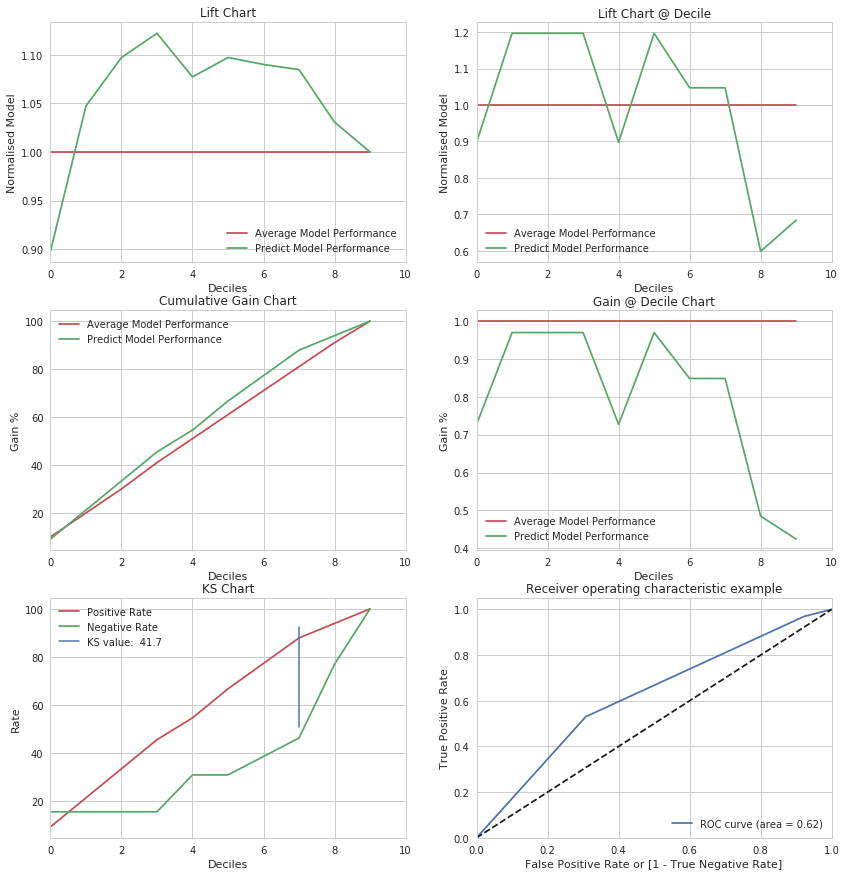

In [156]:
from sklearn.metrics import roc_curve, auc

def get_lift_gain_charts(data, probability_column, actual_column):
    data.sort_values(by=probability_column, ascending=False, inplace=True)
    data.reset_index(inplace=True, drop=True)
    
    #print(data.head(100))
    rows = []
    for group in np.array_split(data, 10):
        numElements = group.shape[0]
        numPos = sum(group[actual_column])
        numNeg = numElements - numPos
        rows.append({"numElements": numElements, "numPos": numPos, "numNeg": numNeg})
        
    df = pd.DataFrame(rows)
    df["cumPosFromModel"] = df.numPos.cumsum()
    df['cumElements'] = df.numElements.cumsum()
    df['Decile'] = round(100 * df.cumElements / df.numElements.sum(), 0)

    ## Lift Calculations
    df['posFromMeanModel'] = df.numElements * df.numPos.sum() / data.shape[0]
    df['cumPosFromMeanModel'] = df.posFromMeanModel.cumsum()
    df['liftFromModel'] = df.cumPosFromModel / df.cumPosFromMeanModel
    df['liftPerDecile'] = df.numPos / df.posFromMeanModel
    
    ## gain calculations
    df['gainFromModel'] = df.cumPosFromModel / df.numPos.sum()
    df['gainAtDecile'] = df.numElements * df.numPos / df.numPos.sum()

    ## KS Calculations
    df['posPct'] = 100 * df.numPos.cumsum() / df.numPos.sum()
    df['negPct'] = 100 * df.numNeg.cumsum() / df.numNeg.sum()
    df['KS'] = abs(df.posPct - df.negPct)
    
    maxKS = np.where(df.KS == np.max(df.KS))[0]
    maxKSVal = np.max(df.KS)
    maxKSy0 = abs(df.loc[maxKS, 'negPct'].values[0])
    maxKSy1 = maxKSy0 + maxKSVal
    
    df['avgLift'] = 1
    #print(df)
    #### Plots
    plt.figure(figsize=(14, 15))
    plt.subplot(3,2,1)
    plt.plot(df.avgLift, 'r-', label='Average Model Performance')
    plt.plot(df.liftFromModel, 'g-', label='Predict Model Performance')
    plt.title('Lift Chart')
    plt.xlabel('Deciles')
    plt.ylabel('Normalised Model')
    plt.legend()
    plt.xlim(0, 10)

    plt.subplot(3,2,2)
    plt.plot(df.avgLift, 'r-', label='Average Model Performance')
    plt.plot(df.liftPerDecile, 'g-', label='Predict Model Performance')
    plt.title('Lift Chart @ Decile')
    plt.xlabel('Deciles')
    plt.ylabel('Normalised Model')
    plt.legend()
    plt.xlim(0, 10)

    plt.subplot(3,2,3)
    plt.plot(df.Decile, 'r-', label='Average Model Performance')
    plt.plot(df.gainFromModel * 100, 'g-', label='Predict Model Performance')
    plt.title('Cumulative Gain Chart')
    plt.xlabel('Deciles')
    plt.ylabel('Gain %')
    plt.legend()
    plt.xlim(0, 10)

    plt.subplot(3,2,4)
    plt.plot(df.avgLift, 'r-', label='Average Model Performance')
    plt.plot(df.gainAtDecile, 'g-', label='Predict Model Performance')
    plt.title('Gain @ Decile Chart')
    plt.xlabel('Deciles')
    plt.ylabel('Gain %')
    plt.legend()
    plt.xlim(0, 10)
    
    
    plt.subplot(3,2,5)
    plt.plot(df.posPct, 'r-', label='Positive Rate')
    plt.plot(df.negPct, 'g-', label='Negative Rate')
    plt.axvline(x = maxKS, ymax = maxKSy0 / 100, ymin=maxKSy1 / 100, linewidth = 1.5,
               label = 'KS value: {:5.1f}'.format(maxKSVal))
    plt.title('KS Chart')
    plt.xlabel('Deciles')
    plt.ylabel('Rate')
    plt.legend()
    plt.xlim(0, 10)
    
    plt.subplot(3,2,6)
    fpr, tpr, thresholds = metrics.roc_curve( data[actual_column], data[probability_column], drop_intermediate = False )
    auc_score = metrics.roc_auc_score( data[actual_column], data[probability_column] )
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.show()
        
get_lift_gain_charts(finTab, 'pred', 'actual')        


/home/sayantan/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


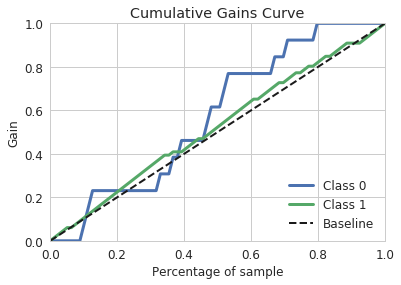

/home/sayantan/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


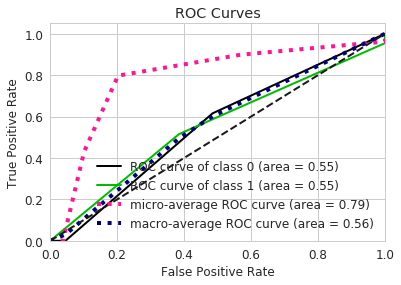

In [157]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(finTab.actual.values, lg_model_1.predict_proba(X_test))
plt.show()

skplt.metrics.plot_roc_curve(finTab.actual.values, lg_model_1.predict_proba(X_test))